In [40]:
import requests

In [4]:
response = requests.get('http://www.naver.com')
naver = response.text


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
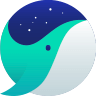
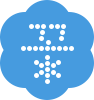

In [5]:
print(naver)

In [54]:
response = requests.put('http://httpbin.org/ip')

In [55]:
print(type(response),response)
print(response.status_code)
print(response.encoding + '\n')
print(response.text + '\n')
print(response.content )

<class 'requests.models.Response'> <Response [405]>
405
ISO-8859-1

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>405 Method Not Allowed</title>
<h1>Method Not Allowed</h1>
<p>The method is not allowed for the requested URL.</p>


b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>405 Method Not Allowed</title>\n<h1>Method Not Allowed</h1>\n<p>The method is not allowed for the requested URL.</p>\n'


In [92]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.summet.com/dmsi/html/codesamples/addresses.html')
#print(response.text)

html_doc = response.text
#html_doc (얘는 str 타입이라 .tap 을 해도 많지 않음.) , 반면에 soup이라는 객체로
                                    # 넣어주어서 .tap 을 하면 가능한 기능이 많음.
    
soup = BeautifulSoup(html_doc, 'html.parser') #html 문서로 읽어오겠다는 의미~ 
#soup


In [58]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

<title>Sample Addresses!</title>
title
Sample Addresses!


In [63]:
print(soup.ul.li) #soup.li 만 써도 비슷은 한데 ul에 소속된 애들중에 li 만 찾고 싶으면
                 # soup.ul.li 로 ul 밑에 녀석들 중에 li 만 가져오게 되었다. 굳!
print(soup.img)

<li>Cecilia Chapman<br/>711-2880 Nulla St.<br/>Mankato Mississippi 96522<br/>(257) 563-7401</li>
None


- find() 함수는 조건을 만족하는 태그를 하나만 가져오는 함수이다 

- find_all() 함수는 원하는 태그가 여러 개 있을 경우 해당하는 태그를 한꺼번에 가져오는 함수이다.

In [86]:
print(soup.find('h1'))
print(type(soup.find('h1')))
print(soup.find_all('h1'))
print(type(soup.find_all('h1')))  # 뭐지 왜 타입이 클래스 라고 나오지? 근데 출력되는거
                                  # 보면 리스트 [] 타입이 맞는거 같은데... 흠...
                                  # [] 로 출력되는거 보면 맞다!

<h1> A page full of sample addresses for your parsing enjoyment!</h1>
<class 'bs4.element.Tag'>
[<h1> A page full of sample addresses for your parsing enjoyment!</h1>]
<class 'bs4.element.ResultSet'>


- get_text() 함수를 통해 태그 내의 텍스트 데이터를 추출하는 것은 아래와 같다.

In [94]:
li_list = list()

li_list = soup.find_all('li')
# print(li_list)
# print(type(li_list))

for li in li_list :
    #print(type(li))
    print(li.get_text())

Cecilia Chapman711-2880 Nulla St.Mankato Mississippi 96522(257) 563-7401
Iris WatsonP.O. Box 283 8562 Fusce Rd.Frederick Nebraska 20620(372) 587-2335
Celeste Slater606-3727 Ullamcorper. StreetRoseville NH 11523(786) 713-8616
Theodore LoweAp #867-859 Sit Rd.Azusa New York 39531(793) 151-6230
Calista Wise7292 Dictum Av.San Antonio MI 47096(492) 709-6392
Kyla OlsenAp #651-8679 Sodales Av.Tamuning PA 10855(654) 393-5734
Forrest Ray191-103 Integer Rd.Corona New Mexico 08219(404) 960-3807
Hiroko PotterP.O. Box 887 2508 Dolor. Av.Muskegon KY 12482(314) 244-6306
Nyssa Vazquez511-5762 At Rd.Chelsea MI 67708(947) 278-5929
Lawrence Moreno935-9940 Tortor. StreetSanta Rosa MN 98804(684) 579-1879
Ina MoranP.O. Box 929 4189 Nunc RoadLebanon KY 69409(389) 737-2852
Aaron Hawkins5587 Nunc. AvenueErie Rhode Island 24975(660) 663-4518
Hedy GreeneAp #696-3279 Viverra. AvenueLatrobe DE 38100(608) 265-2215
Melvin PorterP.O. Box 132 1599 Curabitur Rd.Bandera South Dakota 45149(959) 119-8364
Keefe Sellers347-7

naver~

In [170]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.naver.com')


html_doc = response.text

    
soup = BeautifulSoup(html_doc, 'html.parser')
#soup


In [171]:
soup.find_all('a')    # href : 속성  으로 원하는 녀석들만 골라서 출력이 가능하다.
# soup.find_all('a', {'href' : '#newsstand'})  # 딕셔너리 형태로 넣어주는 것.
soup.find_all('button',{'type' : 'button'})

[<button class="_20PYt6lT _3wm5EzmJ" data-clk="dropclose1a" data-ui-cookie-exp-days="3" data-ui-cookie-key="NM_TOP_PROMOTION" data-ui-cookie-value="1" data-ui-hide-target="#NM_TOP_BANNER" type="button">
 3일 동안 보지 않기
 </button>,
 <button class="btn_more" data-clk-custom="tcc_fin.more" data-next-page="2" type="button"><i class="ico_more"></i>새로운 글 더보기</button>,
 <button aria-pressed="false" class="btn_theme" id="NM_darkmode_btn" role="button" type="button"> <span class="blind">라이트 모드로 보기</span> </button>]

In [157]:
soup.select('a')
soup.select('a > span ')   # a태그 자식의 span만 가져오라는 뜻. 
                            #   >  얘의 의미가 자식을 가져오라는 의미이다.


[<span>뉴스스탠드 바로가기</span>,
 <span>주제별캐스트 바로가기</span>,
 <span>타임스퀘어 바로가기</span>,
 <span>쇼핑캐스트 바로가기</span>,
 <span>로그인 바로가기</span>,
 <span style="background-color: #05c3a7">다운로드</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">한글 입력기</span>,
 <span class="ico_keyboard"></span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="ico_arr"></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span class="etc_area">
 <span class="etc lotto">
 <em class="n@6@">@6@</em><em class="n@7@">@7@</em><em class="n@8@">@8@</em><em class="n@9@">@9@</em><em class="n@10@">@10@</em><em class="n@11@">@11@</em><em class="imsc_bf bonus n@12@">@12@</em>
 </span>
 </span>,
 <span class="common_ico_kwd"><i class="imsc ico @12@">@14@</i></span>,
 <span class="etc_area">
 <span class="etc"><em class="num">@6@</em>원</span>
 </spa

In [181]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=bts')


html_doc = response.text

    
soup = BeautifulSoup(html_doc, 'html.parser')
#soup


In [226]:
soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.group_news > ul')

[<ul class="list_news"> <li class="bx" id="sp_nws_all1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://www.chosun.com/economy/industry-company/2022/01/04/5RBS7KTE6JFWVNJX4BCKC4VKJ4/?utm_source=naver&amp;utm_medium=referral&amp;utm_campaign=naver-news" href="#" onclick="tCR('a=nws_all*h.kep&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws_all*h.kepoff&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript" data-cr-on="a=nws_all*h.kepon&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'

In [196]:
tag = soup.select_one('#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.group_news > ul')
#위의 .select_one 은 타입이 tag 이고, tag만 밑에처럼 또 .select 가 가능하다.

news_list = tag.select('li > div > div > a')

for n in news_list:
    print(n.get_text())

한 벌에 12만원…BTS도 놀란 ‘BTS 잠옷’ 가격
BTS 뷔가 부른 OST, 한국 첫 빌보드 ‘핫 100‘ 진입
네이버웹툰, BTS 슈퍼캐스팅 옥외광고 코엑스 케이팝 스퀘어에 공개
BTS 후보 오른 그래미 시상식, 오미크론 여파 연기 가능성


In [198]:
print(tag)

<ul class="list_news"> <li class="bx" id="sp_nws_all1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://www.chosun.com/economy/industry-company/2022/01/04/5RBS7KTE6JFWVNJX4BCKC4VKJ4/?utm_source=naver&amp;utm_medium=referral&amp;utm_campaign=naver-news" href="#" onclick="tCR('a=nws_all*h.kep&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws_all*h.kepoff&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript" data-cr-on="a=nws_all*h.kepon&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a

In [195]:
print(type(n))

<class 'bs4.element.Tag'>


In [ ]:
#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.group_news

In [203]:
news_list1 = tag.select('#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.group_news > ul > li > div > div > a')

for n1 in news_list:
    print(n1.get_text())

한 벌에 12만원…BTS도 놀란 ‘BTS 잠옷’ 가격
BTS 뷔가 부른 OST, 한국 첫 빌보드 ‘핫 100‘ 진입
네이버웹툰, BTS 슈퍼캐스팅 옥외광고 코엑스 케이팝 스퀘어에 공개
BTS 후보 오른 그래미 시상식, 오미크론 여파 연기 가능성


In [216]:
print(news_list1)
print(type(news_list1))

[<a class="news_tit" href="https://www.chosun.com/economy/industry-company/2022/01/04/5RBS7KTE6JFWVNJX4BCKC4VKJ4/?utm_source=naver&amp;utm_medium=referral&amp;utm_campaign=naver-news" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=880000ED_000000000000000003663976&amp;g=023.0003663976&amp;u='+urlencode(this.href));" target="_blank" title="한 벌에 12만원…BTS도 놀란 ‘BTS 잠옷’ 가격">한 벌에 12만원…<mark>BTS</mark>도 놀란 ‘<mark>BTS</mark> 잠옷’ 가격</a>, <a class="news_tit" href="https://www.seoul.co.kr/news/newsView.php?id=20220105500019&amp;wlog_tag3=naver" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=4&amp;i=880000D1_000000000000000003242562&amp;g=081.0003242562&amp;u='+urlencode(this.href));" target="_blank" title="BTS 뷔가 부른 OST, 한국 첫 빌보드 ‘핫 100‘ 진입"><mark>BTS</mark> 뷔가 부른 OST, 한국 첫 빌보드 ‘핫 100‘ 진입</a>, <a class="news_tit" href="http://www.fnnews.com/news/202201040847465379" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=7&amp;i=880000FF_000000000000000004766273&amp;g=014.00

In [206]:
print(type(n1))

<class 'bs4.element.Tag'>


In [224]:
print(news_list1.get_text()) # 이거 조금 이따 해보자. 뭐지? #밑에 의문해결

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

- 리스트 변수에는 get_text()라는 함수가 존재하지 않습니다. 하지만, 리스트 변수 안에 있는 각 데이터를 for 문으로 하나씩 꺼내면, 해당 데이터는 get_text()라는 함수를 쓸 수 있는 객체이기 때문에, 이와 같이 하나씩 꺼내서 get_text() 함수를 사용하는 것입니다.

- 다른 것들이랑 결국에는 같은 이유로 for 문을 돌려서 꺼내 써야한다.

- 간략히 사과 박스가 있고 그 안에 사과가 있는 상황으로 생각해보시면, 사과 박스는 먹을 수 없어서요. 사과 박스 안에서 각 사과를 꺼내야 해당 사과를 먹을 수 있는 이치와 동일하다고 보시면 좀더 낫지 않을까 생각합니다. 사과 박스가 리스트라고 보시면 좋고, 리스트 안에 있는 각 데이터가 사과 이고, 먹는다는 행위가 get_text() 함수라고 생각하시면 좀더 이해가 쉽지 않을까 생각합니다.

In [223]:
tag = soup.select_one('#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.group_news > ul')

news_list = tag.select('li > div > div > a')

# for n in news_list:
#     print(n.get_attribute_list('title'))
for n in news_list:
    print(n.get_attribute_list('href'))

['https://www.chosun.com/economy/industry-company/2022/01/04/5RBS7KTE6JFWVNJX4BCKC4VKJ4/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news']
['https://www.seoul.co.kr/news/newsView.php?id=20220105500019&wlog_tag3=naver']
['http://www.fnnews.com/news/202201040847465379']
['http://yna.kr/AKR20220105005100075?did=1195m']


In [ ]:
for n in news_list:
    print(n.get_attribute_list('href'))

In [286]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://fow.kr/ranking#1')


html_doc = response.text

    
soup = BeautifulSoup(html_doc, 'html.parser')

In [287]:
soup.select('body > div:nth-child(6) > div:nth-child(1) > div > table')
#얘는 이 밑으로 자바스크립트 코드라서 찾지 못한다. ㅠㅜ
# 이 사이트는 아무래도 동적 사이트라 잘 안되는 듯 싶다.

[<table class="tablesorter rank_ranking" style="width:100%;">
 <thead>
 <tr>
 <th width="60">순위</th>
 <th width="180">소환사명</th>
 <th width="120">티어</th>
 <th>LP</th>
 <th>승률</th>
 <th width="120">모스트 챔프</th>
 </tr>
 </thead>
 <tbody id="r_out">
 </tbody>
 </table>]

In [292]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%83%81%EB%8F%84%EB%8F%99+%EB%82%A0%EC%94%A8')


html_doc = response.text

    
soup = BeautifulSoup(html_doc, 'html.parser')

In [293]:
a = soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.open > div:nth-child(2) > div > div')

In [294]:
for n2 in a:
    print(n2.get_text())

 시간별 예보     날씨   강수   바람   습도              15시  흐림     0°        16시  구름많음     -6°        17시  구름많음     1°        18시  구름많음     1°        19시  구름많음     0°        20시  구름많음     0°        21시  구름많음     -1°        22시  구름많음     -1°        23시  구름많음     -1°        내일  구름많음     -1°        01시  흐림     -2°        02시  맑음     -2°        03시  맑음     -3°        04시  맑음     -3°        05시  맑음     -4°        06시  맑음     -4°        07시  맑음     -4°        08시  맑음     -5°        09시  맑음     -4°        10시  맑음     -2°        11시  맑음     0°        12시  맑음     1°        13시  맑음     2°        14시  맑음     3°        15시  맑음     3°        16시  맑음     3°        17시  맑음     2°        18시  맑음     0°        19시  맑음     -1°        20시  맑음     -1°        21시  맑음     -2°        22시  맑음     -3°        23시  맑음     -3°        모레  맑음     -3°        01시  맑음     -4°        02시  맑음     -4°        03시  맑음     -4°        04시  맑음     -5°        05시  맑음     -5°        06시  맑음     -5°        07시  맑음     -5°        08시  맑음    

In [295]:
b = soup.select('#main_pack > section.sc_new.cs_weather_new._cs_weather > div._tab_flicking > div.content_wrap > div.content_area > div.inner > div > div> ul >li')

In [298]:
print(b)

[<li class="week_item today"> <div class="day_data"> <div class="cell_date"> <span class="date_inner"> <strong class="day">오늘</strong> <span class="date">1.05.</span> </span> </div> <div class="cell_weather"> <span class="weather_inner"> <span class="weather_left"> <strong class="time">오전</strong> <span class="rainfall">10%</span> </span> <i class="wt_icon ico_wt5"><span class="blind">구름많음</span></i> </span> <span class="weather_inner"> <span class="weather_left"> <strong class="time">오후</strong> <span class="rainfall">20%</span> </span> <i class="wt_icon ico_wt5"><span class="blind">구름많음</span></i> </span> </div> <div class="cell_temperature"> <span class="temperature_inner"> <span class="lowest"><span class="blind">최저기온</span>-7°</span> <span class="bar">/</span> <span class="highest"><span class="blind">최고기온</span>4°</span> </span> </div> </div> </li>, <li class="week_item today"> <div class="day_data"> <div class="cell_date"> <span class="date_inner"> <strong class="day">내일</strong

In [296]:
for n2 in b:
    print(n2.get_text())

    오늘 1.05.      오전 10%  구름많음    오후 20%  구름많음     최저기온-7° / 최고기온4°    
    내일 1.06.      10%  맑음    0%  맑음     최저기온-5° / 최고기온4°    
    금 1.07.      0%  맑음    0%  맑음     최저기온-6° / 최고기온4°    
    토 1.08.      30%  구름많음    30%  구름많음     최저기온-4° / 최고기온4°    
    일 1.09.      30%  흐림    30%  구름많음     최저기온-1° / 최고기온4°    
    월 1.10.      30%  구름많음    30%  구름많음     최저기온-4° / 최고기온3°    
    화 1.11.      0%  맑음    0%  맑음     최저기온-8° / 최고기온-1°    
    수 1.12.      0%  맑음    0%  맑음     최저기온-7° / 최고기온1°    
    목 1.13.      30%  구름많음    30%  구름많음     최저기온-4° / 최고기온3°    
    금 1.14.      0%  맑음    0%  맑음     최저기온-6° / 최고기온0°    


In [297]:
soup.find_all('li', {href : )

[<li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history"> <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a> <span class="etc"> <em class="date">@date@.</em> <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a> </span> </li>,
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="suggestion"> <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span> </a> <span class="etc"> <a aria-pressed="false" class="bt_item _add" href="#" role="button"><i class="imsc ico_insert">추가</i></a> </span> </li>,
 <li class="item has_correct _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history"> <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</s